## Importing Libraries & Loading our Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
orders_df=pd.read_csv(r'C:\Users\sneha\Desktop\food_order_ver 2.csv',index_col=['Order_ID'])

In [3]:
orders_df.head()

,Customer_ID,Restaurant_ID,Order_Date,Order_Time,Delivery_Time,TimeforDelivery,Order_Value,Delivery_Fee,Payment_Method,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds,Discount_Type,Discount_Amount,Commission_Percentage,Cost,Revenue,Profit,Profit_Margin
Order_ID,,,,,,,,,,,,,,,,,,,,
1,C8270,R2924,01-02-2024,01:11:00,02:39:00,88,1914,0,Credit Card,0.05,150,47,0,ON APP,96,0.078370,143,150,7,0.046667
2,C1860,R2054,02-02-2024,22:11:00,22:46:00,35,986,40,Digital Wallet,0.10,198,23,0,BASIC,99,0.200811,162,198,36,0.181818
3,C6390,R2870,31-01-2024,05:54:00,06:52:00,58,937,30,Cash on Delivery,0.15,195,45,0,NEW USER,141,0.208111,216,195,-21,-0.107692
4,C6191,R2642,16-01-2024,22:52:00,23:38:00,46,1463,50,Cash on Delivery,0.00,146,27,0,NONE,0,0.099795,77,146,69,0.472603
5,C6734,R2799,29-01-2024,01:19:00,02:48:00,89,1992,30,Cash on Delivery,50.00,130,50,0,PROMO,50,0.065261,130,130,0,0.000000


## Exploratory Data Analysis

**a) We begin by examining the range of values for all our metrics, along with their mean, standard deviation, and percentile values.**

In [4]:
orders_df.describe()

,TimeforDelivery,Order_Value,Delivery_Fee,Discounts_and_Offers,Commission_Fee,Payment_Processing_Fee,Refunds,Discount_Amount,Commission_Percentage,Cost,Revenue,Profit,Profit_Margin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,73.575000,1053.969000,28.620000,10.112150,126.99000,29.832000,28.300000,74.333000,0.197509,161.085000,126.99000,-34.095000,-0.472607
std,26.015133,530.975339,16.958278,20.016301,43.06405,11.627165,49.614228,68.707866,0.226562,85.760472,43.06405,97.661906,1.080963
min,30.000000,104.000000,0.000000,0.000000,50.00000,10.000000,0.000000,0.000000,0.026065,16.000000,50.00000,-389.000000,-7.480770
25%,50.000000,597.750000,20.000000,0.050000,90.00000,20.000000,0.000000,27.000000,0.077625,95.000000,90.00000,-93.000000,-0.879410
50%,74.000000,1038.500000,30.000000,0.100000,127.00000,30.000000,0.000000,50.000000,0.120247,141.000000,127.00000,-21.000000,-0.163888
75%,96.000000,1494.000000,40.000000,0.150000,164.00000,40.000000,50.000000,101.000000,0.207108,215.250000,164.00000,37.250000,0.263514
max,119.000000,1995.000000,50.000000,50.000000,200.00000,50.000000,150.000000,299.000000,1.690910,473.000000,200.00000,176.000000,0.916667


**b) How many repeat Customers to we have?**

In [5]:
orders_made= orders_df.groupby(by='Customer_ID').size().reset_index(name='Orders Made')
repeat_customers=orders_made[orders_made['Orders Made']>1]
repeat_customers.sort_values(by='Orders Made',ascending=False)

,Customer_ID,Orders Made
726,C7938,3
730,C7949,3
2,C1009,2
530,C6232,2
561,C6486,2
576,C6588,2
577,C6592,2
590,C6732,2
620,C6977,2
642,C7190,2


We have 51 repeat customers; 2 of them have placed orders three times, while the remaining 49 have ordered twice

**c) Which of our retaurants partners is fulfilling most orders?**

In [6]:
norders= orders_df.groupby(by='Restaurant_ID').size().reset_index(name='No. of Orders')
norders.sort_values(by='No. of Orders',ascending=False)

,Restaurant_ID,No. of Orders
195,R2317,6
434,R2726,5
483,R2804,5
317,R2523,5
10,R2016,5
...,...,...
127,R2208,1
355,R2585,1
354,R2584,1
128,R2209,1


**d) Which of our restaurants partners has highest average order value?**

In [7]:
order_val= orders_df.groupby(by='Restaurant_ID')['Order_Value'].mean().reset_index()
order_val.sort_values(by='Order_Value',ascending=False).rename(columns={'Order_Value':'Avg Order_Value (AOV)'})

,Restaurant_ID,Avg Order_Value (AOV)
378,R2630,1995.0
354,R2584,1981.0
267,R2436,1976.0
272,R2447,1974.0
312,R2516,1960.0
...,...,...
210,R2339,147.0
438,R2732,143.0
197,R2319,129.0
379,R2631,118.0


**e)Which of our restaurant partners has the highest number of initiated refunds, and what is the average cost of these refunds to us?**

In [9]:
returns_df=orders_df[orders_df['Refunds']>0]
numof=returns_df.groupby(by='Restaurant_ID')['Refunds'].count().reset_index()
amt=returns_df.groupby(by='Restaurant_ID')['Refunds'].mean().reset_index()
numof.sort_values(by='Refunds',ascending=False)
amt.sort_values(by='Refunds',ascending=False)
refunds=pd.merge(numof,amt,on='Restaurant_ID').rename(columns={'Refunds_x':'No. Of Refunds','Refunds_y':'Average Refund Amount'})
refunds.sort_values(by=['No. Of Refunds','Average Refund Amount'],ascending=False)

,Restaurant_ID,No. Of Refunds,Average Refund Amount
134,R2570,4,137.500000
9,R2028,4,62.500000
81,R2334,3,133.333333
41,R2129,3,66.666667
36,R2114,2,150.000000
...,...,...,...
234,R2959,1,50.000000
239,R2974,1,50.000000
240,R2975,1,50.000000
242,R2988,1,50.000000


**f) How many of our restaurants partners relationships are profitable?**

In [10]:
rest=orders_df.groupby(by='Restaurant_ID')['Profit'].mean().reset_index()
rest[rest['Profit']>0]

,Restaurant_ID,Profit
0,R2001,78.000000
9,R2015,31.000000
10,R2016,9.000000
11,R2019,68.000000
13,R2021,1.000000
...,...,...
609,R2983,61.000000
612,R2987,90.000000
613,R2988,21.666667
618,R2994,13.500000


**Out of our 621 restaurant partners, only 225 are profitable for us.**

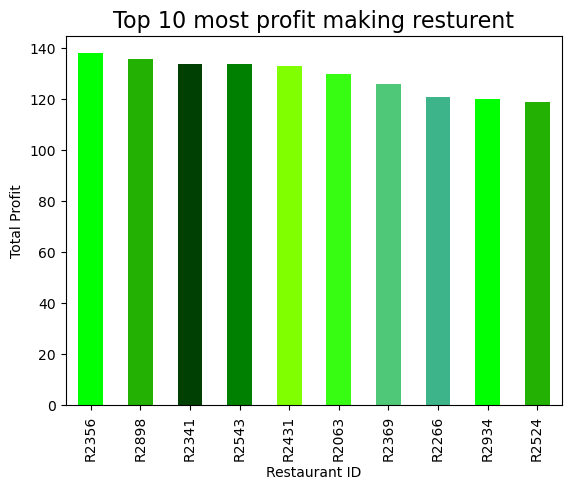

In [11]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].mean().nlargest(10).plot(kind='bar',color=('#00FF00','#23B103','#004002','#008000','#7FFF00','#37FD12','#4FC978','#3DB489'))
plt.title('Top 10 most profit making resturent',fontsize = 16)
plt.xlabel('Restaurant ID')
plt.ylabel('Total Profit')
plt.show()

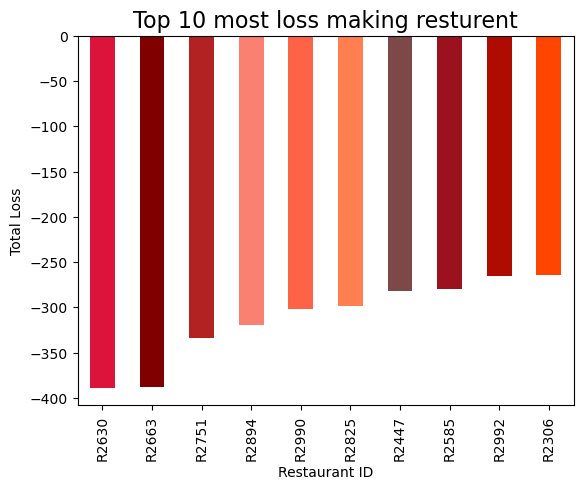

In [12]:
ax3 = orders_df.groupby('Restaurant_ID')['Profit'].mean().nsmallest(10).plot(kind='bar',color=('#dc143c','#800000','#b22222','#fa8072','#ff6347','#ff7f50','#7c4848','#9b111e','#ae0c00','#ff4500'))
plt.title('Top 10 most loss making resturent',fontsize = 16)
plt.xlabel('Restaurant ID')
plt.ylabel('Total Loss')
plt.show()

**g) How do different discount types affect our profitability**

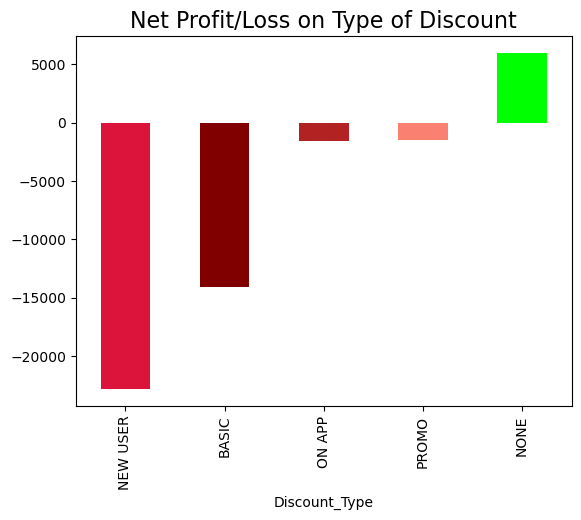

In [13]:
net_profit = orders_df.groupby('Discount_Type')['Profit'].sum().sort_values()
net_profit.plot(kind='bar', color=('#dc143c','#800000','#b22222','#fa8072','#00FF00'))
plt.title('Net Profit/Loss on Type of Discount',fontsize = 16)
plt.show()

In [14]:
orders_df.groupby('Discount_Type')['Profit'].sum().sort_values().reset_index()

,Discount_Type,Profit
0,NEW USER,-22833
1,BASIC,-14115
2,ON APP,-1598
3,PROMO,-1523
4,NONE,5974


Since we need new customers, we can't remove the new user discount, so **we focus on phasing out the BASIC discount to Improve Our Profitability**

In [15]:
orders_df.groupby('Discount_Type')['Customer_ID'].count().sort_values().reset_index()

,Discount_Type,Customer_ID
0,ON APP,183
1,NONE,185
2,NEW USER,198
3,PROMO,201
4,BASIC,233


**h) What is the breakdown of our operating costs?**

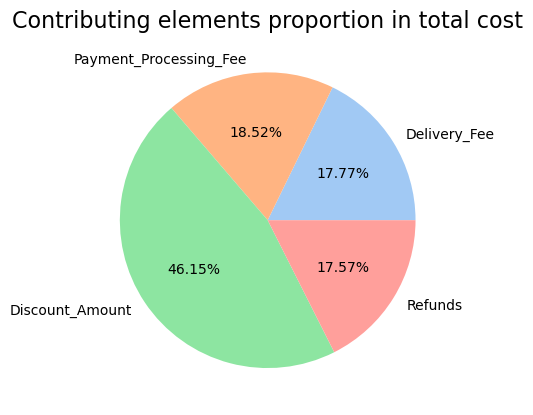

In [16]:
cost_elements = orders_df[['Delivery_Fee','Payment_Processing_Fee','Discount_Amount','Refunds']].sum()
plt.pie(x=cost_elements,labels=cost_elements.index,autopct='%0.2f%%',colors=sns.color_palette('pastel'))
plt.title('Contributing elements proportion in total cost',fontsize = 16)
plt.show()

**i) How does Profit vary with Discount Amount?**

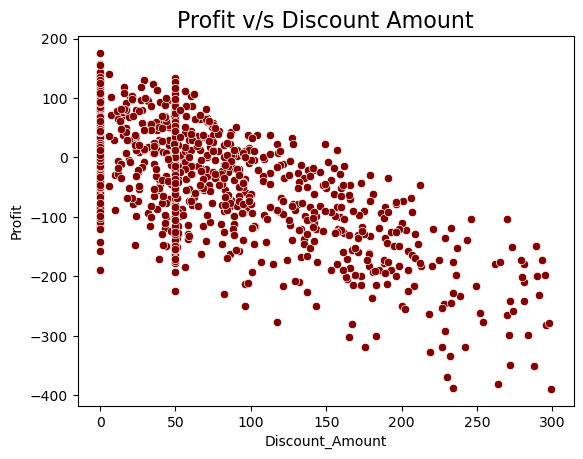

In [17]:
sns.scatterplot(x='Discount_Amount',y='Profit',data=orders_df,color='#800000')
plt.title('Profit v/s Discount Amount',fontsize = 16)
plt.show()

As the discount amount increases, we increasingly enter loss-making territory

**j) How does Profit with Delivery Time?**

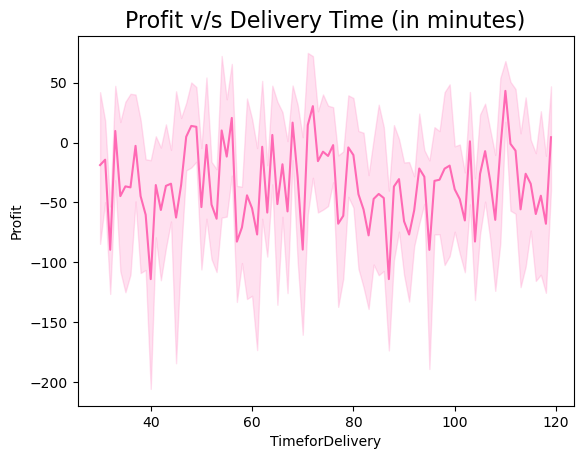

In [18]:
sns.lineplot(x='TimeforDelivery',y='Profit',data=orders_df,color='hotpink')
plt.title('Profit v/s Delivery Time (in minutes)',fontsize = 16)
plt.show()

Delivery time has little effect on Profits

**k) Does Order Value have any effect on Commision Fee or Commission Percentage?**

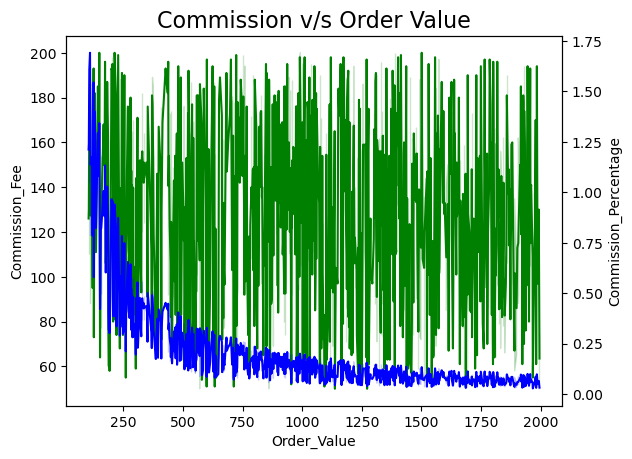

In [19]:
p=sns.lineplot(x='Order_Value',y='Commission_Fee',data=orders_df,color='green')
q=p.twinx()
q=sns.lineplot(x='Order_Value',y='Commission_Percentage',data=orders_df,color='blue')
plt.title('Commission v/s Order Value',fontsize = 16)
plt.show()

The Commission Percentage drops sharply as the order value increases, whilst the Comission Fee is all over the place with respect to Order Value. This highlghts a need for making Commissions as percentage of Order Value instead of a flat fee. **Let's investigate to decide what percentage should be selected as minimum**

In [20]:
print('Loss Incurred for Orders with Commission Percentage less than 5%: ',orders_df[orders_df['Commission_Percentage']<0.05]['Profit'].sum())
print('Loss Incurred for Orders with Commission Percentage less than 10%: ',orders_df[orders_df['Commission_Percentage']<0.1]['Profit'].sum())
print('Loss Incurred for Orders with Commission Percentage less than 15%: ',orders_df[orders_df['Commission_Percentage']<0.15]['Profit'].sum())
print('Loss Incurred for Orders with Commission Percentage less than 20%: ',orders_df[orders_df['Commission_Percentage']<0.2]['Profit'].sum())

Loss Incurred for Orders with Commission Percentage less than 5%:  -12344
Loss Incurred for Orders with Commission Percentage less than 10%:  -35191
Loss Incurred for Orders with Commission Percentage less than 15%:  -40198
Loss Incurred for Orders with Commission Percentage less than 20%:  -40824


Since the majority of the loss is incurred when ComMission Percentage is lower than 10%, **We should set the Minimum Commission Percentage to be 10%**

**l) A Heatmap illustrating the various correlations between different metrics**

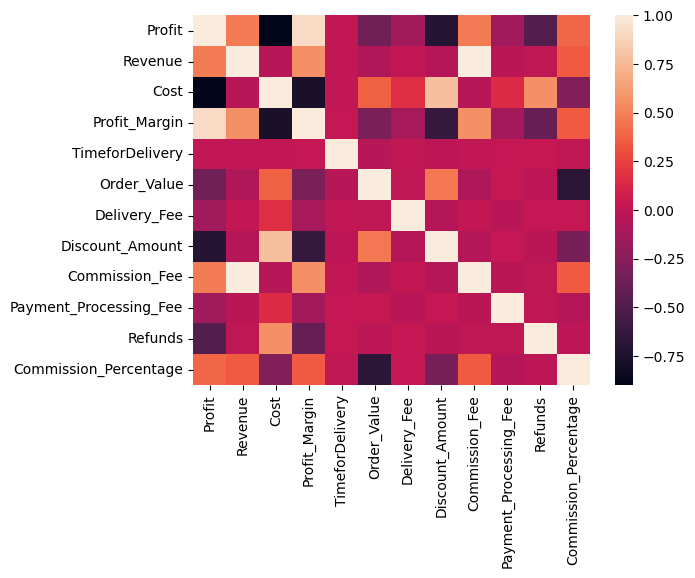

In [21]:
metricsdf=orders_df[['Profit','Revenue','Cost','Profit_Margin','TimeforDelivery',
                   'Order_Value','Delivery_Fee','Discount_Amount','Commission_Fee',
                   'Payment_Processing_Fee','Refunds','Commission_Percentage']]
matrix=metricsdf.corr()
sns.heatmap(matrix)
plt.show()